In [1]:
import pandas as pd 
import numpy as np 
import sklearn as skl 
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import time
import warnings
import os
import seaborn as sns # for ploting
from sklearn.metrics import fbeta_score, precision_score, recall_score, confusion_matrix,f1_score
import itertools
import pickle

In [2]:
import matplotlib
from matplotlib import pyplot as plt,style
from multiprocessing import Pool

In [3]:
style.use('ggplot')
np.random.seed(42) 

def plot_confusion_matrix(cm, classes,
                          recall,precision,f2,f1,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.text(0,2.3, f" Recall:{recall},\n Precision:{precision},\n F2 Score:{f2},\n F1 Score:{f1}", fontsize=12)
    plt.show()

In [4]:
warnings.simplefilter("ignore", category=DeprecationWarning)

root_feature = '/Users/abhijit/Desktop/GIT_Projects/intl-iot/model/features-testing1.1/us'
root_model='/Users/abhijit/Desktop/GIT_Projects/intl-iot/models_final/features-testing1.1/us'

root_output=root_model+'/output'
dir_tsne_plots = root_model + '/tsne-plots'

num_pools=12

In [5]:
lfiles = []
lparas= []
ldnames = []
for csv_file in os.listdir(root_feature):
    if csv_file.endswith('.csv'):
        print(csv_file)
        train_data_file = '%s/%s' % (root_feature, csv_file)
        dname = csv_file[:-4]
        lfiles.append(train_data_file)
        ldnames.append(dname)
        lparas.append((train_data_file, dname))
p = Pool(num_pools)

yi-camera.csv


In [6]:
for i in lparas:
    print(i)

('/Users/abhijit/Desktop/GIT_Projects/intl-iot/model/features-testing1.1/us/yi-camera.csv', 'yi-camera')


In [6]:
lparas[0][0]

'/Users/abhijit/Desktop/GIT_Projects/intl-iot/model/features-testing1.1/us/yi-camera.csv'

In [7]:
data = pd.read_csv(lparas[0][0])
data.head()

,meanBytes,minBytes,maxBytes,medAbsDev,skewLength,kurtosisLength,q10,q20,q30,q40,...,kurtosisTBP,skewTBP,network_to,network_from,network_both,network_to_external,network_local,anonymous_source_destination,device,state
0,169.031250,46,1214,29.652044,3.036190,8.953171,50.0,54.0,54.0,65.2,...,25.677235,5.212452,50,70,0,8,0,0,yi-camera,power
1,160.101562,46,1214,14.826022,3.273655,9.789039,50.0,54.0,54.0,62.0,...,77.798463,8.288856,56,69,0,3,0,0,yi-camera,power
2,159.250000,46,1214,23.721635,3.230347,10.081830,50.0,54.0,54.0,54.0,...,103.026808,9.924942,52,68,0,8,0,0,yi-camera,power
3,186.226562,46,1214,29.652044,2.870199,7.741643,50.0,54.0,62.0,66.0,...,73.163848,7.890162,60,63,0,5,0,0,yi-camera,power
4,178.250000,46,1214,17.791227,2.982131,8.014788,54.0,54.0,54.0,66.0,...,16.486251,4.049408,53,69,0,6,0,0,yi-camera,power


In [8]:
set(data['state'])

{'android_lan_photo',
 'android_lan_recording',
 'android_lan_watch',
 'android_wan_photo',
 'android_wan_recording',
 'android_wan_watch',
 'local_move',
 'power'}

In [9]:
anomaly_data = pd.read_csv('/Users/abhijit/Desktop/GIT_Projects/intl-iot/model/new-features-testing1.1-all/us/google-home-mini.csv')

anomaly_data.head()

,meanBytes,minBytes,maxBytes,medAbsDev,skewLength,kurtosisLength,q10,q20,q30,q40,...,kurtosisTBP,skewTBP,network_to,network_from,network_both,network_to_external,network_local,anonymous_source_destination,device,state
0,533.482143,46,1484,157.155835,0.781977,-1.303548,66.0,66.0,66.0,98.8,...,55.509713,6.894902,0,0,0,224,0,0,google-home-mini,local_voice
1,570.375000,46,1484,216.459924,0.658865,-1.487235,66.0,66.0,66.0,155.0,...,61.964982,7.308551,0,0,0,224,0,0,google-home-mini,local_voice
2,570.700893,46,1484,216.459924,0.641472,-1.492163,66.0,66.0,66.0,104.0,...,78.237031,8.325250,0,0,0,224,0,0,google-home-mini,local_voice
3,602.928571,46,1484,216.459924,0.543719,-1.601945,66.0,66.0,77.0,155.0,...,91.516524,9.082257,0,0,0,224,0,0,google-home-mini,local_voice
4,554.861607,46,1484,131.951597,0.673235,-1.470555,66.0,66.0,66.0,70.8,...,70.467879,7.286562,0,0,0,224,0,0,google-home-mini,local_voice


In [10]:
set(anomaly_data['state'])

{'local_voice', 'local_volume', 'power'}

In [11]:
anomaly_data = anomaly_data[(anomaly_data['state'] == 'local_voice') | (anomaly_data['state'] == 'android_lan_photo')]

In [45]:
anomaly_data

,meanBytes,minBytes,maxBytes,medAbsDev,skewLength,kurtosisLength,q10,q20,q30,q40,...,kurtosisTBP,skewTBP,network_to,network_from,network_both,network_to_external,network_local,anonymous_source_destination,device,state
0,533.482143,46,1484,157.155835,0.781977,-1.303548,66.0,66.0,66.0,98.8,...,55.509713,6.894902,0,0,0,224,0,0,google-home-mini,local_voice
1,570.375000,46,1484,216.459924,0.658865,-1.487235,66.0,66.0,66.0,155.0,...,61.964982,7.308551,0,0,0,224,0,0,google-home-mini,local_voice
2,570.700893,46,1484,216.459924,0.641472,-1.492163,66.0,66.0,66.0,104.0,...,78.237031,8.325250,0,0,0,224,0,0,google-home-mini,local_voice
3,602.928571,46,1484,216.459924,0.543719,-1.601945,66.0,66.0,77.0,155.0,...,91.516524,9.082257,0,0,0,224,0,0,google-home-mini,local_voice
4,554.861607,46,1484,131.951597,0.673235,-1.470555,66.0,66.0,66.0,70.8,...,70.467879,7.286562,0,0,0,224,0,0,google-home-mini,local_voice
5,559.892857,46,1484,216.459924,0.694745,-1.388520,66.0,66.0,66.0,155.0,...,41.854113,6.393505,0,0,0,224,0,0,google-home-mini,local_voice
6,423.250000,46,1484,74.871412,1.216114,-0.368596,66.0,66.0,66.0,66.0,...,63.765590,7.649886,0,0,0,224,0,0,google-home-mini,local_voice
7,542.486607,46,1484,148.260222,0.735363,-1.393785,66.0,66.0,66.0,98.0,...,78.354138,8.170785,0,0,0,224,0,0,google-home-mini,local_voice
8,466.968750,46,1484,120.832081,1.023661,-0.847855,66.0,66.0,66.0,89.0,...,32.452371,5.360351,0,0,0,224,0,0,google-home-mini,local_voice
9,527.281250,46,1434,131.951597,0.778617,-1.301875,66.0,66.0,66.0,98.0,...,40.455331,6.217971,0,0,0,224,0,0,google-home-mini,local_voice


In [12]:
len(anomaly_data)

400

In [13]:
ss1 = StandardScaler()
ss2 = StandardScaler()
data_features = data.drop(['device','state'], axis=1).fillna(-1)
data_std = ss1.fit_transform(data_features)
data_std = pd.DataFrame(data_std, index=data_features.index,columns=data_features.columns)
data_std['state'] = data['state']

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [14]:
anomaly_features = anomaly_data.drop(['device','state'], axis=1).fillna(-1)
anomaly_std = ss2.fit_transform(anomaly_features)
anomaly_std = pd.DataFrame(anomaly_std, index=anomaly_features.index, columns=anomaly_features.columns)
anomaly_std['state'] = anomaly_data['state']

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [15]:
train, normal_test, _, _ = train_test_split(data_std, data_std, test_size=.2, random_state=42)

normal_valid, normal_test, _, _ = train_test_split(normal_test, normal_test, test_size=.5, random_state=42)
anormal_valid, anormal_test, _, _ = train_test_split(anomaly_std, anomaly_std, test_size=.5, random_state=42)

In [16]:
train = train.reset_index(drop=True)
valid = normal_valid.append(anormal_valid).sample(frac=1).reset_index(drop=True)
test = normal_test.append(anormal_test).sample(frac=1).reset_index(drop=True)

In [17]:
len(train)

1984

In [18]:
%%markdown
### Save testing data. (Uncomment if not available already)

### Save testing data. (Uncomment if not available already)


In [19]:
check = ss2.inverse_transform(train.drop('state', axis=1))
check = pd.DataFrame(check, columns=train.columns[train.columns != 'state'])
check['state'] = train['state']
check.to_csv('training_data_without_anomaly.csv')

In [20]:
check = ss2.inverse_transform(test.drop('state', axis=1))
check = pd.DataFrame(check, columns=test.columns[test.columns != 'state'])
check['state'] = test['state']
check.to_csv('testing_data_with_anomaly.csv')

In [21]:
train['state'] = train['state'].apply(lambda x: 1 if x == 'local_voice' else 0)
valid['state'] = valid['state'].apply(lambda x: 1 if x == 'local_voice' else 0)
test['state'] = test['state'].apply(lambda x: 1 if x == 'local_voice' else 0)

In [22]:
print('Train shape: ', train.shape)
print('Proportion os anomaly in training set: %.2f\n' % train['state'].mean())
print('Valid shape: ', valid.shape)
print('Proportion os anomaly in validation set: %.2f\n' % valid['state'].mean())
print('Test shape:, ', test.shape)
print('Proportion os anomaly in test set: %.2f\n' % test['state'].mean())

Train shape:  (1984, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (448, 28)
Proportion os anomaly in validation set: 0.45

Test shape:,  (448, 28)
Proportion os anomaly in test set: 0.45



In [23]:
%%markdown
# Load original model 

# Load original model 


In [24]:
original_model = pickle.load(open('/Users/abhijit/Desktop/GIT_Projects/intl-iot/model/tagged-models/us/yi-cameraknn.model','rb'))

In [25]:
labels = []
with open('/Users/abhijit/Desktop/GIT_Projects/intl-iot/model/tagged-models/us/yi-camera.label.txt') as ff:
    for line in ff.readlines():
        line = line.strip()
        if line.startswith('#') or line == '':
            continue
        labels.append(line)

In [26]:
check = ss2.inverse_transform(test.drop('state', axis=1))
check = pd.DataFrame(check, columns=test.columns[test.columns != 'state'])
check['state'] = test['state']

In [27]:
ss_knn = original_model['standard_scaler']
pca = original_model['pca']
trained_model = original_model['trained_model']

In [28]:
unknown_data = ss_knn.transform(check.drop('state', axis=1))
unknown_data = pca.transform(unknown_data)
unknown_data = pd.DataFrame(unknown_data)
unknown_data = unknown_data.iloc[:, :4]
y_predict = trained_model.predict(unknown_data)

In [29]:
p_readable = []
for pindex in range(len(y_predict)):
    label_predicted = labels[np.argmax(y_predict[pindex])]
    p_readable.append(label_predicted)

In [30]:
y_hat_test = []
for i in p_readable:
    if i:
        y_hat_test.append(0)
    else:
        y_hat_test.append(1)

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


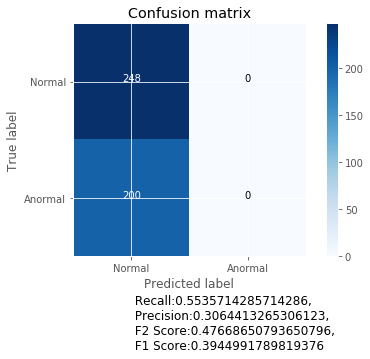

In [31]:
recall = recall_score(y_pred=y_hat_test, y_true=test['state'].values,average='weighted')
precision = precision_score(y_pred=y_hat_test, y_true=test['state'].values,average='weighted')
f2 = fbeta_score(y_pred=y_hat_test, y_true=test['state'].values, beta=2,average='weighted')
f1 = f1_score(y_pred=y_hat_test, y_true=test['state'].values,average='weighted')

cnf_matrix = confusion_matrix(test['state'].values, y_hat_test)
plot_confusion_matrix(cnf_matrix, classes=['Normal','Anormal'],
                      recall=recall,precision=precision,f2 = f2,f1=f1,title='Confusion matrix')

In [32]:
%%markdown
# New model 

# New model 


In [33]:
%%markdown
## Types of outliers
In general, outliers can be classified into three categories, namely global outliers, contextual (or conditional) outliers, and collective outliers.

Global outlier — Object significantly deviates from the rest of the data set

Contextual outlier — Object deviates significantly based on a selected context. For example, 28⁰C is an outlier for a Moscow winter, but not an outlier in another context, 28⁰C is not an outlier for a Moscow summer.

Collective outlier — A subset of data objects collectively deviate significantly from the whole data set, even if the individual data objects may not be outliers. For example, a large set of transactions of the same stock among a small party in a short period can be considered as an evidence of market manipulation.

## Types of outliers
In general, outliers can be classified into three categories, namely global outliers, contextual (or conditional) outliers, and collective outliers.

Global outlier — Object significantly deviates from the rest of the data set

Contextual outlier — Object deviates significantly based on a selected context. For example, 28⁰C is an outlier for a Moscow winter, but not an outlier in another context, 28⁰C is not an outlier for a Moscow summer.

Collective outlier — A subset of data objects collectively deviate significantly from the whole data set, even if the individual data objects may not be outliers. For example, a large set of transactions of the same stock among a small party in a short period can be considered as an evidence of market manipulation.


In [34]:
from scipy.stats import multivariate_normal

mu = train.drop('state', axis=1).mean(axis=0).values
sigma = train.drop('state', axis=1).cov().values
model = multivariate_normal(cov=sigma, mean=mu, allow_singular=True)

print(np.median(model.logpdf(valid[valid['state'] == 0].drop('state', axis=1).values))) 
print(np.median(model.logpdf(valid[valid['state'] == 1].drop('state', axis=1).values)))

1.6875748271171842
-585.7348023808257


In [35]:
tresholds = np.linspace(-100,-10, 300)
scores = []
for treshold in tresholds:
    y_hat = (model.logpdf(valid.drop('state', axis=1).values) < treshold).astype(int)
    scores.append([recall_score(y_pred=y_hat, y_true=valid['state'].values),
                 precision_score(y_pred=y_hat, y_true=valid['state'].values),
                 fbeta_score(y_pred=y_hat, y_true=valid['state'].values, beta=2)])

scores = np.array(scores)
print(scores[:, 2].max(), scores[:, 2].argmax())

0.9950248756218906 238


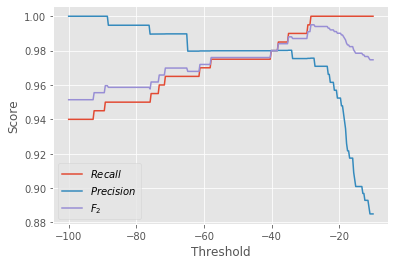

In [36]:
plt.plot(tresholds, scores[:, 0], label='$Recall$')
plt.plot(tresholds, scores[:, 1], label='$Precision$')
plt.plot(tresholds, scores[:, 2], label='$F_2$')
plt.ylabel('Score')
# plt.xticks(np.logspace(-10, -200, 3))
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.show()

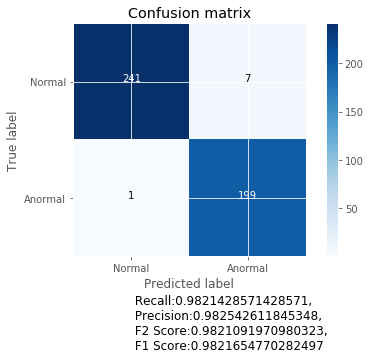

In [37]:
final_tresh = tresholds[scores[:, 2].argmax()]
y_hat_test = (model.logpdf(test.drop('state', axis=1).values) < final_tresh).astype(int)

recall = recall_score(y_pred=y_hat_test, y_true=test['state'].values,average='weighted')
precision = precision_score(y_pred=y_hat_test, y_true=test['state'].values,average='weighted')
f2 = fbeta_score(y_pred=y_hat_test, y_true=test['state'].values, beta=2,average='weighted')
f1 = f1_score(y_pred=y_hat_test, y_true=test['state'].values,average='weighted')

cnf_matrix = confusion_matrix(test['state'].values, y_hat_test)
plot_confusion_matrix(cnf_matrix, classes=['Normal','Anormal'],
                      recall=recall,precision=precision,f2 = f2,f1=f1, title='Confusion matrix')

In [38]:
combined_data = data_std.append(anomaly_std)

In [39]:
combined_data['state'] = combined_data['state'].apply(lambda x: 1 if x == 'local_voice' else 0)

In [40]:
columns_data = combined_data.columns
columns_data = columns_data.drop('state')

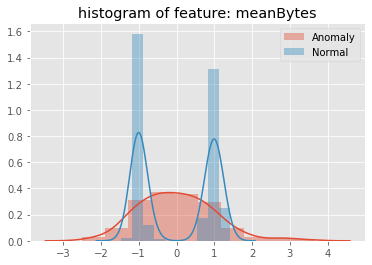

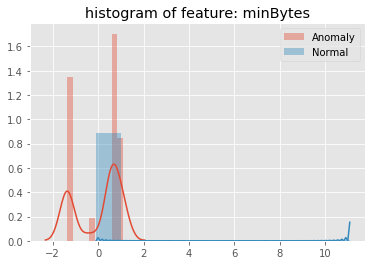

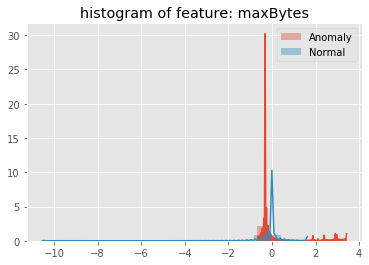

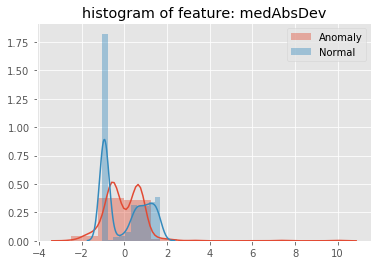

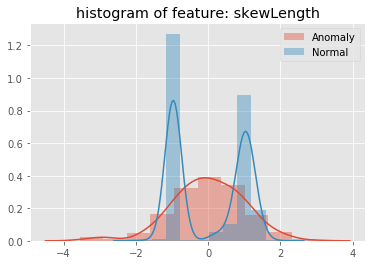

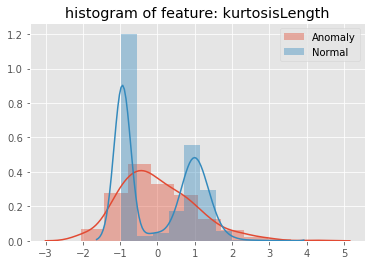

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


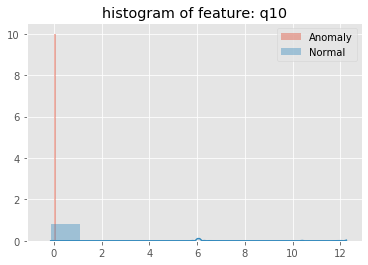

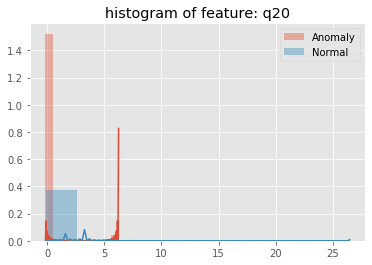

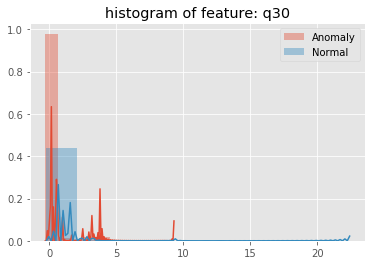

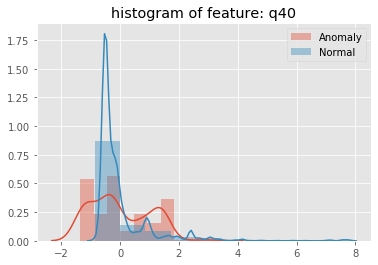

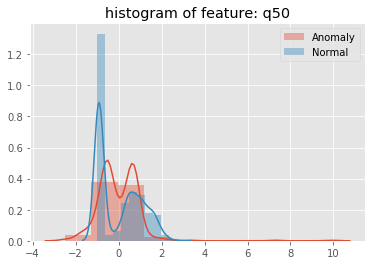

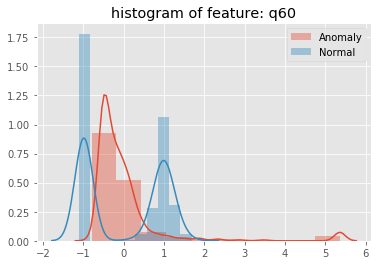

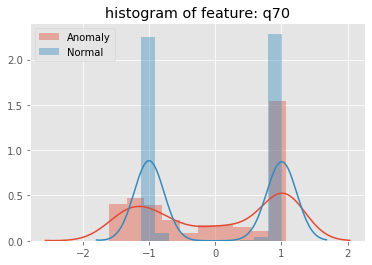

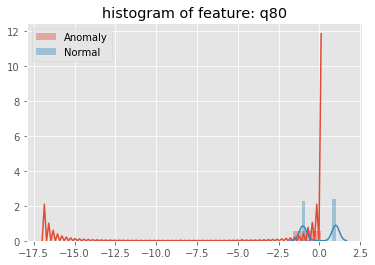

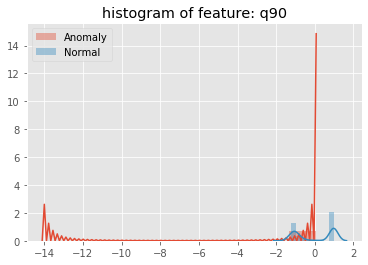

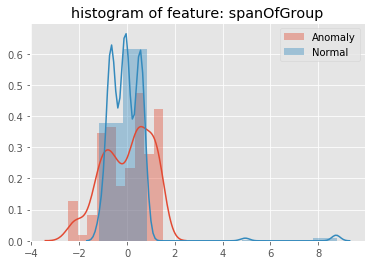

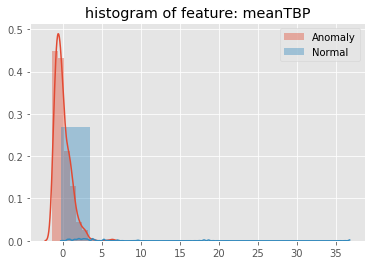

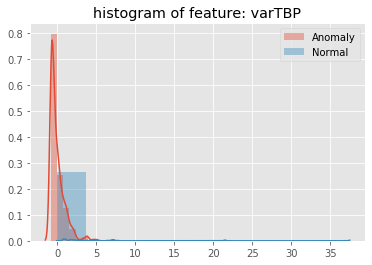

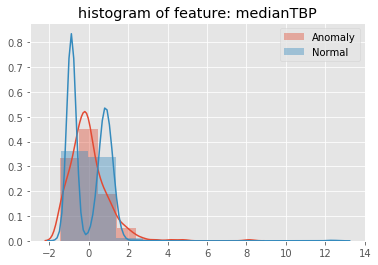

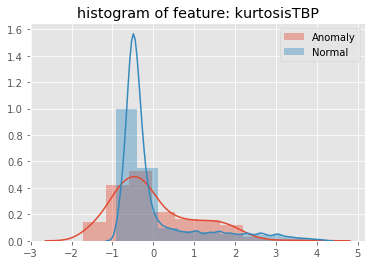

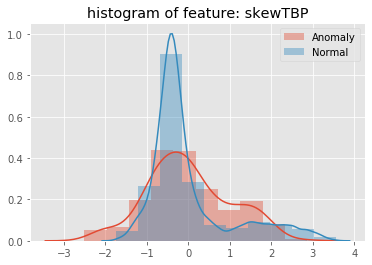

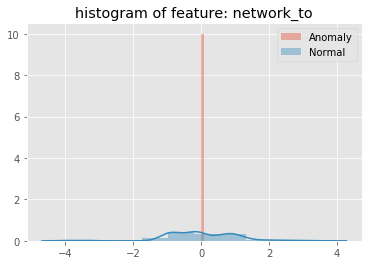

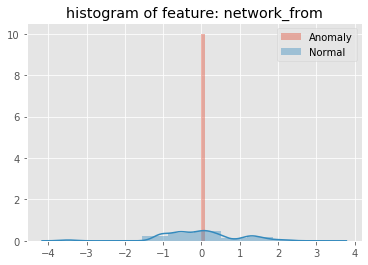

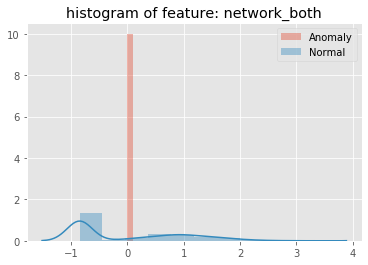

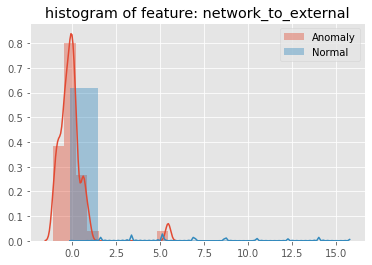

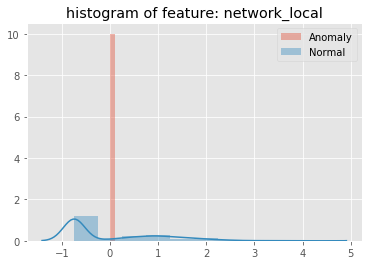

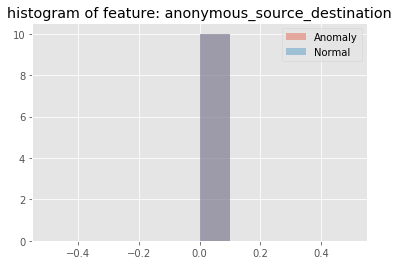

In [41]:
import seaborn as sns 
import matplotlib.gridspec as gridspec
dataset = combined_data
# plt.figure(figsize=(12,28*5))
# gs = gridspec.GridSpec(28, 1)
for feature in columns_data:
    ax = plt.subplot()
    sns.distplot(dataset[feature][dataset.state == 1], bins=10, label='Anomaly')
    sns.distplot(dataset[feature][dataset.state == 0], bins=10, label='Normal')
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(feature))
    plt.legend(loc='best')
    plt.show()

In [42]:
%%markdown
## Saving the new model. 

## Saving the new model. 


In [43]:
d = dict({'mvmodel' : model, 'treshold' : final_tresh})

In [44]:
f = open("multivariate_model.pkl", "wb")
pickle.dump(d, f)
f.close()